## Desafío entregable #7: Data Wrangling

In [161]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn import preprocessing

In [162]:
df = pd.read_csv('Spotify_Track_Dataset.csv')

### Primera inspección de los datos

In [163]:
df.shape

(114000, 21)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [165]:
df.describe().round(2)

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00
mean,56999.50,33.24,228029.15,0.57,0.64,5.31,-8.26,0.64,0.08,0.31,0.16,0.21,0.47,122.15,3.90
std,32909.11,22.31,107297.71,0.17,0.25,3.56,5.03,0.48,0.11,0.33,0.31,0.19,0.26,29.98,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,-49.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,28499.75,17.00,174066.00,0.46,0.47,2.00,-10.01,0.00,0.04,0.02,0.00,0.10,0.26,99.22,4.00
50%,56999.50,35.00,212906.00,0.58,0.68,5.00,-7.00,1.00,0.05,0.17,0.00,0.13,0.46,122.02,4.00
75%,85499.25,50.00,261506.00,0.70,0.85,8.00,-5.00,1.00,0.08,0.60,0.05,0.27,0.68,140.07,4.00
max,113999.00,100.00,5237295.00,0.98,1.00,11.00,4.53,1.00,0.96,1.00,1.00,1.00,1.00,243.37,5.00


In [166]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Tratamiento de datos tipo NaN

In [167]:
df.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [168]:
df = df.dropna()
df.isna().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Se procede a eliminar canciones con registros del tipo NaN, en entregas anteriores se vió que sólo una cancion posee variables vacías o nulas.

### Tratamiento de datos duplicados

In [169]:
df.sort_values(['popularity'], ascending = False).head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance
81051,81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,pop
51664,51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,...,-5.548,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop
89411,89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggaeton
81210,81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,pop


Muchas de las canciones se encuentran repetidas varias veces, encontrando que fueron clasificadas en géneros distintos. Observese que la canción "Unholy" posee dos entradas en la cual sólo difiere en el género musical, ¡incluso posee el mismo track_id! Se usa esta última variable para detectar los duplicados y eliminarlos.

In [170]:
df.duplicated(subset = ['track_id']).value_counts()

False    89740
True     24259
dtype: int64

El total de canciones repetidas asciende a 24259, de un total de 114.000, lo cual es el 21% del dataset, un número realmente alto.

In [171]:
df = df.drop_duplicates(subset = ['track_id'])
df.duplicated(subset = ['track_id']).value_counts()

False    89740
dtype: int64

In [172]:
df.sort_values(['popularity'], ascending = False).head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,dance
51664,51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,...,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop
20008,20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,dance
67356,67356,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,latin
67358,67358,6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Me Porto Bonito,97,178567,True,0.911,0.712,...,-5.105,0,0.0817,0.09010,0.000027,0.0933,0.425,92.005,4,latin


Luego de eliminar los duplicados se observa ahora que, por ejemplo, la canción "Unholy" sólo aparece una vez.

### Tratamiento de outliers

En entregas anteriores se observó que existen numerosos outliers en el dataset, el gráfico inmediatamente abajo ilustra tal situación. Se buscó eliminar sólo aquellos que sean muy distorsivos en las distribuciones, evitando reducir severamente el número de entradas en el dataset.

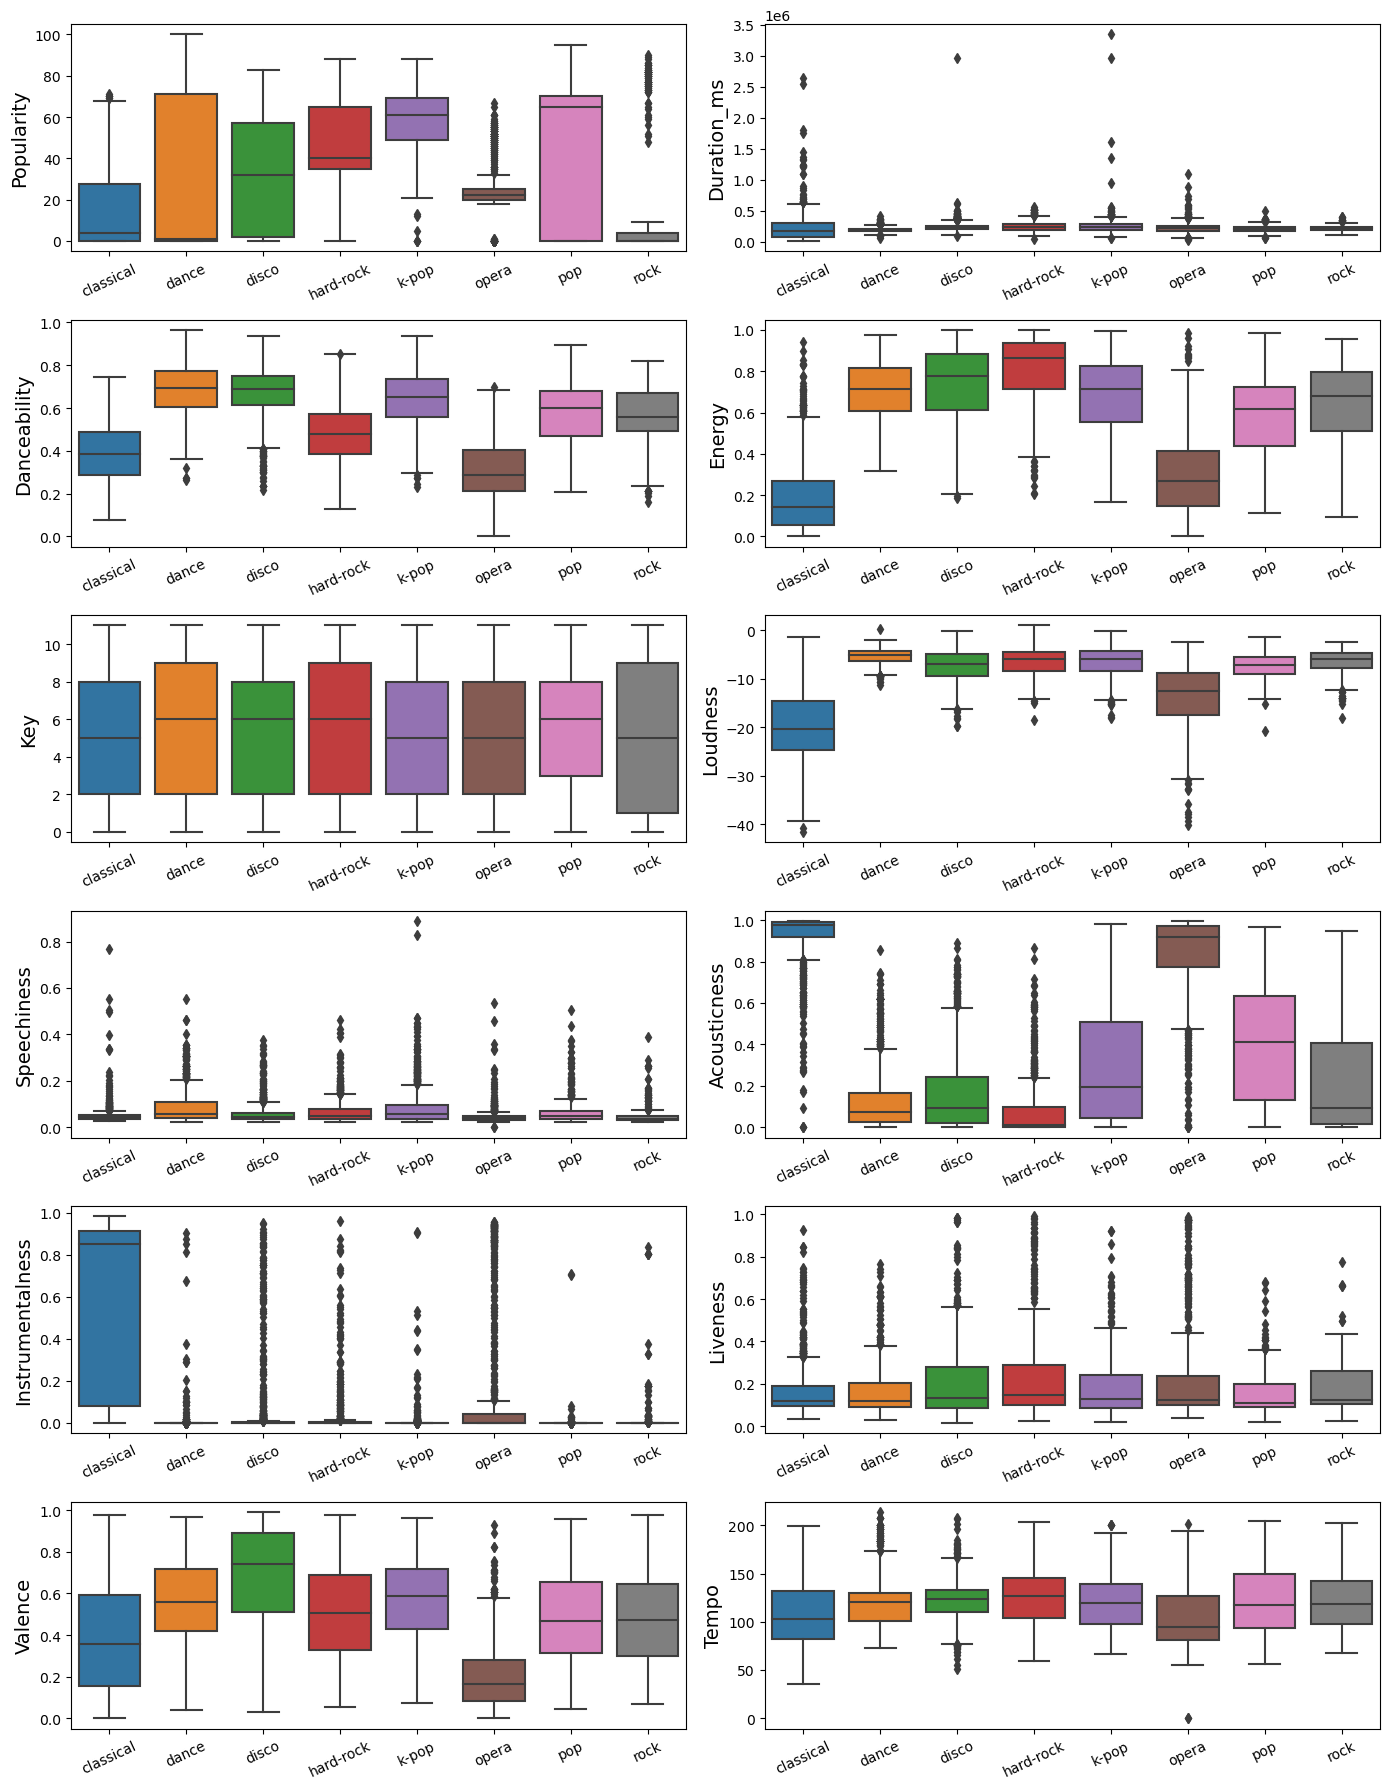

In [173]:
df_sel = df[df['track_genre'].isin(['classical', 'opera', 'rock', 'hard-rock', 'pop', 'k-pop', 'dance', 'disco'])]
columns = df_sel.columns[5:-2] # Selecciono los parámetros que considero más relevantes
l = [i for i in columns if i not in ['explicit', 'mode']]

plt.figure(figsize = (14, 18))
      
for x, column in zip(range(12), df_sel[l]):
    plt.subplot(int(len(l)/2), 2, x+1)
    sns.boxplot(data = df_sel, y = column, x = df_sel['track_genre']) 
    plt.xticks(rotation = 25)
    plt.xlabel("")
    plt.ylabel(l[x].capitalize(), fontsize = 14)
    
plt.tight_layout()

In [174]:
df_filtro = df[(np.abs(stats.zscore(df['duration_ms'])) < 3)]

Sólo fueron removidos los outliers de la variable "duration_ms", debido a que el criterio que se toma es el de dejar fuera aquellos registros que se aparten en ± 3σ (desviaciones estándar). Esto supone que la distribución es normal, lo que no se cumple para la mayoría de las variables. Abajo se muestran de nuevo los gráficos de caja pero con los outliers eliminados.

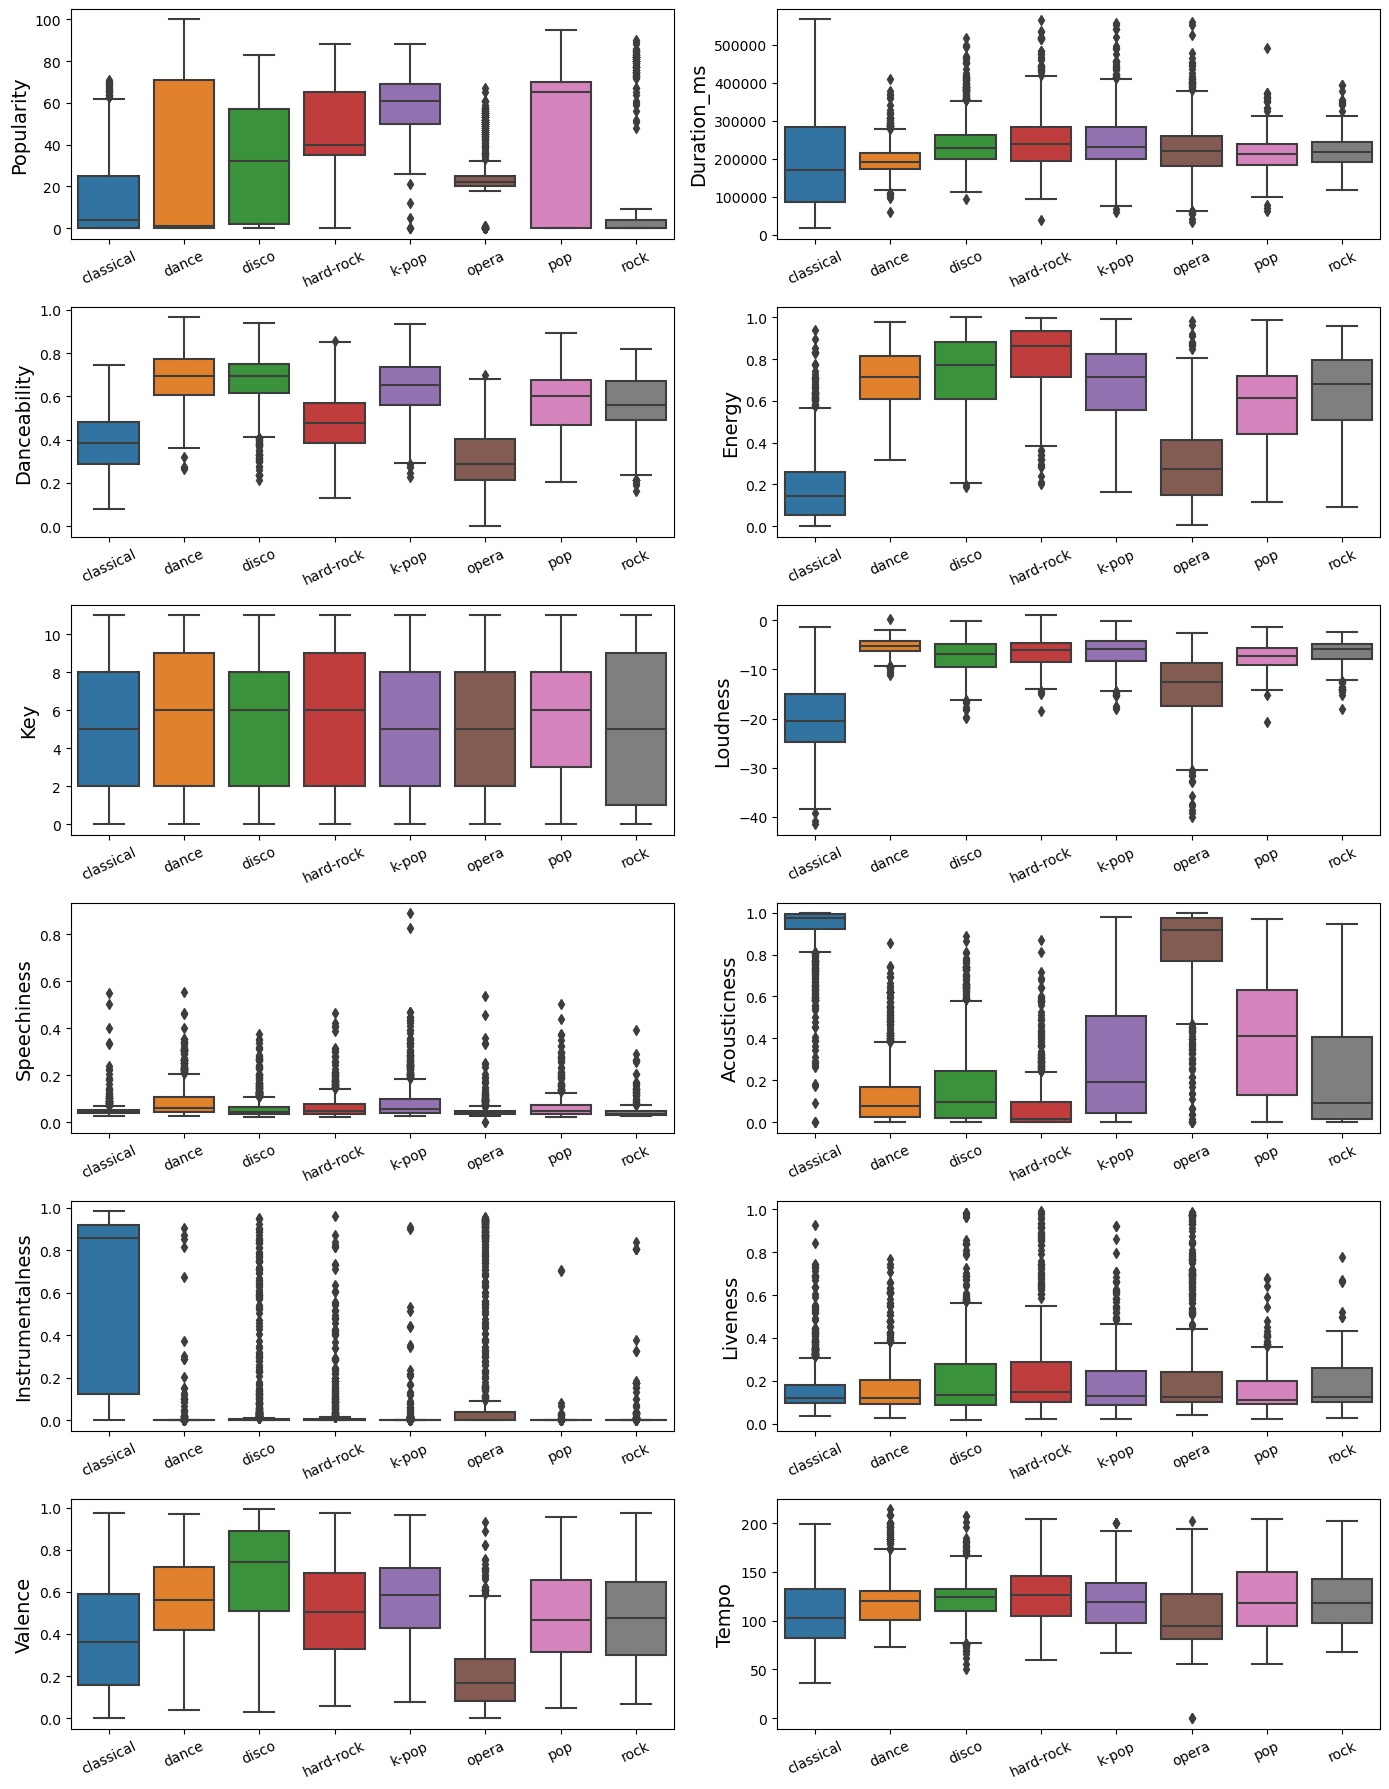

In [175]:
df_sel = df_filtro[df_filtro['track_genre'].isin(['classical', 'opera', 'rock', 'hard-rock', 'pop', 'k-pop', 'dance', 'disco'])]
columns = df_sel.columns[5:-2] # Selecciono los parámetros que considero más relevantes
l = [i for i in columns if i not in ['explicit', 'mode']]

plt.figure(figsize = (14, 18))
      
for x, column in zip(range(12), df_sel[l]):
    plt.subplot(int(len(l)/2), 2, x+1)
    sns.boxplot(data = df_sel, y = column, x = df_sel['track_genre']) 
    plt.xticks(rotation = 25)
    plt.xlabel("")
    plt.ylabel(l[x].capitalize(), fontsize = 14)
    
plt.tight_layout()

### Tratamiento de variables

In [176]:
df1 = df_filtro.copy()

Se eliminaron las columnas "Unnamed: 0" y "track_id" que sólo indica el número de fila y que identifica la canción en el servicio Spotify, respectivamente. Se expresó la duración de las canciones en minutos (en lugar de milisegundos) y se modificó la columna "loudness" para que informe valores positivos. Por último, en el caso que una canción posea más de un intérprete, la columna "artists" presenta a los artistas separados por punto y coma (;), por ello se separa las artistas y se selecciona sólo el principal.

In [177]:
# Borramos las columnas "Unnamed: 0" y "track_id"
df1.drop(['Unnamed: 0', 'track_id'], axis = 1, inplace = True)

# Pasamos de ms a minutos
df1['duration_min'] = (df1['duration_ms']/(60 * 1000)).round(2)
df1.drop('duration_ms', axis = 1, inplace = True)

# Expresamos el volumen en números positivos
df1['loudness_db'] = - df1['loudness']
df1.drop('loudness', axis = 1, inplace = True)

# Eliminamos los artistas secundarios
df1[['artists', 'artist_1']] = df['artists'].str.split(';', 1, expand = True)
df1.drop('artist_1', axis = 1, inplace = True)

Speechiness detecta la presencia de palabra hablada. Mientras más palabra hablada posea (talk show, audiobook, poesía), más cerca de 1 estará el valor. Valores entre 0.33 y 0.66 describen piezas musicales con carácter mixto entre música y palabra hablada. Valores por debajo de 0.33 representan música y otros temas con voz cantada. Con tales rangos crearemos una clasificación cualitativa en lugar de un rango númerico, con la idea de simplificar el análisis. 

In [178]:
group_names = ['Music', 'Mixed', 'Spoken']

df1['speechiness'] = pd.cut(df1['speechiness'], [0, 0.33, 0.66, 1], labels = group_names, include_lowest = True)

In [179]:
df1.head()

,artists,album_name,track_name,popularity,explicit,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,loudness_db
0,Gen Hoshino,Comedy,Comedy,73,False,0.676,0.4610,1,0,Music,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3.84,6.746
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,False,0.420,0.1660,1,1,Music,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2.49,17.235
2,Ingrid Michaelson,To Begin Again,To Begin Again,57,False,0.438,0.3590,0,1,Music,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,3.51,9.734
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,False,0.266,0.0596,0,1,Music,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,3.37,18.515
4,Chord Overstreet,Hold On,Hold On,82,False,0.618,0.4430,2,1,Music,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,3.31,9.681


### Tratamiento de variables categóricas

In [180]:
df2 = df1.copy()
ord = preprocessing.OrdinalEncoder()

Debido a que el dataset está compuesto por algunas variables que son categóricas, debemos transformar estas columnas en valores numéricos tales que los algoritmos de aprendizaje automático puedan procesar. Esto se hace mediante el comando Ordinal Encoder.

In [181]:
df2['track_genre'] = ord.fit_transform(df2[['track_genre']])
df2['explicit'] = ord.fit_transform(df2[['explicit']])
df2['speechiness'] = ord.fit_transform(df2[['speechiness']])
df2.head()

,artists,album_name,track_name,popularity,explicit,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,loudness_db
0,Gen Hoshino,Comedy,Comedy,73,0.0,0.676,0.4610,1,0,1.0,0.0322,0.000001,0.3580,0.715,87.917,4,0.0,3.84,6.746
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,0.0,0.420,0.1660,1,1,1.0,0.9240,0.000006,0.1010,0.267,77.489,4,0.0,2.49,17.235
2,Ingrid Michaelson,To Begin Again,To Begin Again,57,0.0,0.438,0.3590,0,1,1.0,0.2100,0.000000,0.1170,0.120,76.332,4,0.0,3.51,9.734
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,0.0,0.266,0.0596,0,1,1.0,0.9050,0.000071,0.1320,0.143,181.740,3,0.0,3.37,18.515
4,Chord Overstreet,Hold On,Hold On,82,0.0,0.618,0.4430,2,1,1.0,0.4690,0.000000,0.0829,0.167,119.949,4,0.0,3.31,9.681


Este es el aspecto del dataframe luego del proceso de limpieza y transformación de los datos.